### Collision detection

Given `N` rectangles on the plane. Each has a width, a height and coordinates of the bottom left corner. Sides are parallel to the axes Ox and Oy. Each rectangle has a velocity, which is a 2-dimensional vector. 

Two rectangles may collide. One collision is a pair of rectangles which have a common point. When one of the rectangles is inside another it is a collision too.

Every tick each of the rectangles moves along its velocity vector.

####  The task

Given `T` ticks. On each tick output the number of collisions. Provide unit and stress tests.

#### Score

Your score depends on the speed of your algorithm. For the values `N` and `T` greater than 1000 it might be tricky to calculate everything in 1 second. `O(Tn^2)` algorithm gives you 4 out of 10.

#### Hints

1) You can start with `O(Tn^2)` algorithm, which simply checks all pairs of rectangles on every tick, but it does not pass all of the tests. You can verify your fast solution with this naive algorithm on small input.

2) Fast solutions might divide the plane in regions, sort the rectangles, even build trees of them. You can try any ideas in your solution.

3) There are many books and articles about collision detection, and many of them rely on simple data structures and algorithms such as sorting, trees (graphs without cycles) and so on. Try what you like.

4) See examples below.

5) Feel free to use or change DrawExample function. It might help you to visualize your ideas.

In [12]:
class Point:
    def __init__(self, x, y):
        self.point = [x, y]

    def __getitem__(self, i):
        return self.point[i]
    
    def x(self):
        return self.point[0]
    
    def y(self):
        return self.point[1]

class Object:
    def __init__(self, velocity):
        self.velocity = velocity

class Rectangle(Object):
    def __init__(self, botLeft, width, height, velocity):
        super().__init__(velocity)
        self.botLeft = botLeft
        self.width = width
        self.height = height

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [14]:
def DrawExample(rectangles):
    colors = [
        'b',
        'r',
        'g',
    ]
    fig, ax = plt.subplots()
    ax.plot()
    for rect, color in zip(rectangles, colors):
        p = patches.Rectangle(rect.botLeft, rect.width, rect.height, edgecolor=color, facecolor='none')
        ax.add_patch(p)
    return ax

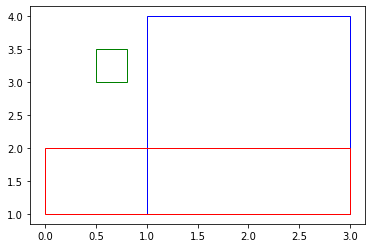

In [15]:
rectangles = [
    Rectangle(Point(1, 1), 2, 3, Point(0, 0)),
    Rectangle(Point(0, 1), 3, 1, Point(0.5, 1)),
    Rectangle(Point(0.5, 3), 0.3, 0.5, Point(0, 0)),
]
ax = DrawExample(rectangles)
plt.show()

#### First. Tick == 0

Three rectangles on the plane, one collision.

#### Next. Tick == 1

Red moves along its velocity vector == Point(0.5, 1).

Others stand still.

Now there are 2 collisions.

In [16]:
tick = 1

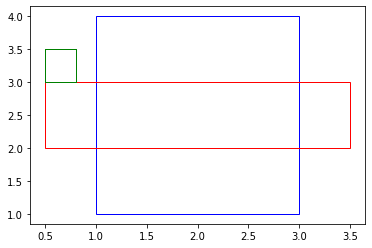

Tick 1


In [17]:
red = rectangles[1]
red.botLeft = Point(red.botLeft.x() + red.velocity.x(), red.botLeft.y() + red.velocity.y())
ax = DrawExample(rectangles)
ax.add_patch(patches.Rectangle((0.5, 3), 0.3, 0.5, edgecolor='g', facecolor='none'))
plt.show()
print("Tick", tick)
tick += 1

You can run the below cell multiple times to see the movement of the red one.

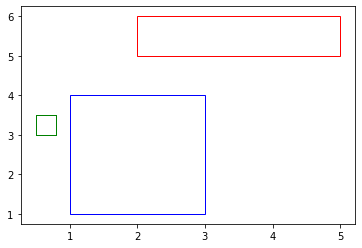

Tick 4


In [21]:
red = rectangles[1]
red.botLeft = Point(red.botLeft.x() + red.velocity.x(), red.botLeft.y() + red.velocity.y())
ax = DrawExample(rectangles)
ax.add_patch(patches.Rectangle((0.5, 3), 0.3, 0.5, edgecolor='g', facecolor='none'))
plt.show()
print("Tick", tick)
tick += 1

In [19]:
def CountCollisions(rects: [Rectangle], ticks: int):
    """ Implement me! """